<a href="https://colab.research.google.com/github/Globnsk/PYTHON/blob/main/Less3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!pwd

/content


In [3]:
ls

drive/  sample_data/


#### Лекция 9. Модификация таблиц с Pandas

In [5]:
users = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Churn_Modelling.csv')
users

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


#### Создание новых признаков

In [ ]:
users['new_feature'] = 0
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,new_feature
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0


In [ ]:
users['Age (days)'] = users['Age'] * 365
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,new_feature,Age (days)
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,15330
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,14965
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,15330
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,14235
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,15695


#### Метод iterrows

In [ ]:
for i, row in users.iloc[:2].iterrows():
    print(row)
    print('__' * 30)

RowNumber                  1
CustomerId          15634602
Surname             Hargrave
CreditScore              619
Geography             France
Gender                Female
Age                       42
Tenure                     2
Balance                  0.0
NumOfProducts              1
HasCrCard                  1
IsActiveMember             1
EstimatedSalary    101348.88
Exited                     1
new_feature                0
Name: 0, dtype: object
____________________________________________________________
RowNumber                  2
CustomerId          15647311
Surname                 Hill
CreditScore              608
Geography              Spain
Gender                Female
Age                       41
Tenure                     1
Balance             83807.86
NumOfProducts              1
HasCrCard                  0
IsActiveMember             1
EstimatedSalary    112542.58
Exited                     0
new_feature                0
Name: 1, dtype: object
_______________________

#### Мат операции с признаками

In [ ]:
age_days = []

for i, row in users.iterrows():
    age_days.append(row['Age'] * 365)

age_days[:10]

[15330, 14965, 15330, 14235, 15695, 16060, 18250, 10585, 16060, 9855]

users['Age (days) 2'] = age_days
users.head()

##### Но одна проблема с перебором всех строк датафрейма в цикле - это очень долго. Поэтому можем пользоваться методом apply, который ускоряет обход всех строк. Для этого нужно реализовать функцию (или же пользоваться анонимными функциями) и передать её в метод apply:

In [ ]:
def age_to_days(x):
    return x * 365

users['Age (days) 3'] = users['Age'].apply(age_to_days)
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,new_feature,Age (days),Age (days) 2,Age (days) 3
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,15330,15330,15330
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,14965,14965,14965
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,15330,15330,15330
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,14235,14235,14235
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,15695,15695,15695


##### Если в вашем наборе данных очень много строк, то и выполнение apply может затянуться, в этом случае можно визуализировать процесс обхода датафрейма через библиотеку tqdm:

In [9]:
import time
from tqdm import tqdm
tqdm.pandas()


def age_to_days(x):
    time.sleep(0.001)
    return x * 365

users['Age'].progress_apply(age_to_days)

100%|██████████| 10000/10000 [00:11<00:00, 883.38it/s]


,Age
0,15330
1,14965
2,15330
3,14235
4,15695
...,...
9995,14235
9996,12775
9997,13140
9998,15330


##### Удалить столбец

In [ ]:
users.drop(columns='new_feature')
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,new_feature,Age (days),Age (days) 2,Age (days) 3
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,15330,15330,15330
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,14965,14965,14965
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,15330,15330,15330
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,14235,14235,14235
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,15695,15695,15695


In [7]:
users = users.drop(columns=['RowNumber', 'CreditScore', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited'])
users.head()

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary
0,15634602,Hargrave,France,Female,42,101348.88
1,15647311,Hill,Spain,Female,41,112542.58
2,15619304,Onio,France,Female,42,113931.57
3,15701354,Boni,France,Female,39,93826.63
4,15737888,Mitchell,Spain,Female,43,79084.10


#### Запишем в новый файл

In [25]:
users.to_csv('/content/drive/MyDrive/Colab Notebooks/users.csv', index=False)

### Отредактируем исходный файл и результат запишем в новый файл Bank.csv

In [26]:
users = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Churn_Modelling.csv')
users = users.drop(columns=['RowNumber', 'Surname', 'Geography', 'Gender', 'Age', 'EstimatedSalary'])
users.head()

,CustomerId,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,619,2,0.00,1,1,1,1
1,15647311,608,1,83807.86,1,0,1,0
2,15619304,502,8,159660.80,3,1,0,1
3,15701354,699,1,0.00,2,0,0,0
4,15737888,850,2,125510.82,1,1,1,0


In [23]:
users.to_csv('/content/drive/MyDrive/Colab Notebooks/bank.csv', index=False)


In [6]:
users = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/users.csv')
users

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary
0,15634602,Hargrave,France,Female,42,101348.88
1,15647311,Hill,Spain,Female,41,112542.58
2,15619304,Onio,France,Female,42,113931.57
3,15701354,Boni,France,Female,39,93826.63
4,15737888,Mitchell,Spain,Female,43,79084.10
...,...,...,...,...,...,...
9993,15719294,Wood,France,Female,29,167773.55
9994,15606229,Obijiaku,France,Male,39,96270.64
9995,15569892,Johnstone,France,Male,35,101699.77
9996,15584532,Liu,France,Female,36,42085.58


In [46]:
bank = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bank.csv')
bank

,CustomerId,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,619,2,0.00,1,1,1,1
1,15647311,608,1,83807.86,1,0,1,0
2,15619304,502,8,159660.80,3,1,0,1
3,15701354,699,1,0.00,2,0,0,0
4,15737888,850,2,125510.82,1,1,1,0
...,...,...,...,...,...,...,...,...
9995,15606229,771,5,0.00,2,1,0,0
9996,15569892,516,10,57369.61,1,1,1,0
9997,15584532,709,7,0.00,1,0,1,1
9998,15682355,772,3,75075.31,2,1,0,1


##### Либо указать атрибут inplace=True:

In [ ]:
users.drop(columns='Age (days)', inplace=True)
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age (days) 2,Age (days) 3
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,15330,15330
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,14965,14965
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,15330,15330
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,14235,14235
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,15695,15695


##### При этом можно удалять не только один признак за раз, а целый список признаков:

In [ ]:
users.drop(columns=['Age (days) 2', 'Age (days) 3'], inplace=True)
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Изменение существующих признаков

In [ ]:
users['target'] = 0
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,target
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0


In [ ]:
users.loc[users['Geography'] == 'France']

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,target
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0


In [ ]:
users.loc[users['Geography'] == 'France', 'target']

0       0
2       0
3       0
6       0
8       0
       ..
9994    0
9995    0
9996    0
9997    0
9999    0
Name: target, Length: 5014, dtype: int64

In [ ]:
users.loc[users['Geography'] == 'France', 'target'] = 1
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,target
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0


#### .replace

In [ ]:
users['Gender'].replace({'Female': 'F', 'Male': 'M'}, inplace=True)
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,target
0,1,15634602,Hargrave,619,France,F,42,2,0.00,1,1,1,101348.88,1,1
1,2,15647311,Hill,608,Spain,F,41,1,83807.86,1,0,1,112542.58,0,0
2,3,15619304,Onio,502,France,F,42,8,159660.80,3,1,0,113931.57,1,1
3,4,15701354,Boni,699,France,F,39,1,0.00,2,0,0,93826.63,0,1
4,5,15737888,Mitchell,850,Spain,F,43,2,125510.82,1,1,1,79084.10,0,0


### Методы агрегации
##### Агрегация, или агрегирование — процесс объединения элементов в одно значение.Агрегация данных нужна для того, чтобы подсчитать статистики в таблицы, например, для того, чтобы узнать средний возраст клиентов или же их максимальный чек.Дальше обсудим, как можно агрегировать значения в таблицах.


##### Первый способ - вызвать метод agg() у pd.Series и передать в него список желаемых агрегаций:

In [ ]:
users['Age'].agg(['min', 'max'])

min    18
max    92
Name: Age, dtype: int64

In [ ]:
users.agg({
    'Age': ['min', 'max'],
    'EstimatedSalary': 'mean'
})

,Age,EstimatedSalary
min,18.0,NaN
max,92.0,NaN
mean,NaN,100090.239881


#### Методы объединения

In [16]:
bank.shape

(9895, 8)

#### 1 С помощью merge

In [18]:
merged = users.merge(bank, left_on='CustomerId', right_on='CustomerId')
merged.head()

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,France,Female,42,101348.88,619,2,0.00,1,1,1,1
1,15647311,Hill,Spain,Female,41,112542.58,608,1,83807.86,1,0,1,0
2,15619304,Onio,France,Female,42,113931.57,502,8,159660.80,3,1,0,1
3,15701354,Boni,France,Female,39,93826.63,699,1,0.00,2,0,0,0
4,15737888,Mitchell,Spain,Female,43,79084.10,850,2,125510.82,1,1,1,0


#### 2. join Объединяет по признаку

In [19]:
users_id = users.set_index('CustomerId')
users_id.head()

,Surname,Geography,Gender,Age,EstimatedSalary
CustomerId,,,,,
15634602,Hargrave,France,Female,42,101348.88
15647311,Hill,Spain,Female,41,112542.58
15619304,Onio,France,Female,42,113931.57
15701354,Boni,France,Female,39,93826.63
15737888,Mitchell,Spain,Female,43,79084.10


In [20]:
bank_id = bank.set_index('CustomerId')
bank_id.head()

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
CustomerId,,,,,,,
15634602,619,2,0.00,1,1,1,1
15647311,608,1,83807.86,1,0,1,0
15619304,502,8,159660.80,3,1,0,1
15701354,699,1,0.00,2,0,0,0
15737888,850,2,125510.82,1,1,1,0


In [21]:
bank_id.join(users_id).head()

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Surname,Geography,Gender,Age,EstimatedSalary
CustomerId,,,,,,,,,,,,
15634602,619,2,0.00,1,1,1,1,Hargrave,France,Female,42,101348.88
15647311,608,1,83807.86,1,0,1,0,Hill,Spain,Female,41,112542.58
15619304,502,8,159660.80,3,1,0,1,Onio,France,Female,42,113931.57
15701354,699,1,0.00,2,0,0,0,Boni,France,Female,39,93826.63
15737888,850,2,125510.82,1,1,1,0,Mitchell,Spain,Female,43,79084.10


In [22]:
bank_id.join(users_id).reset_index().head()

,CustomerId,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Surname,Geography,Gender,Age,EstimatedSalary
0,15634602,619,2,0.00,1,1,1,1,Hargrave,France,Female,42,101348.88
1,15647311,608,1,83807.86,1,0,1,0,Hill,Spain,Female,41,112542.58
2,15619304,502,8,159660.80,3,1,0,1,Onio,France,Female,42,113931.57
3,15701354,699,1,0.00,2,0,0,0,Boni,France,Female,39,93826.63
4,15737888,850,2,125510.82,1,1,1,0,Mitchell,Spain,Female,43,79084.10


#### Атрибут how

### LEFT

In [5]:
toy_df1 = pd.DataFrame({
    'col_1': [1, 2, 3],
    'col_2': [9, 9, 9]
})

toy_df2 = pd.DataFrame({
    'col_1': [3, 4],
    'col_3': [0, 0]
})

display(toy_df1, toy_df2)


,col_1,col_2
0,1,9
1,2,9
2,3,9


,col_1,col_3
0,3,0
1,4,0


In [24]:
toy_df1.merge(toy_df2, how='left')

,col_1,col_2,col_3
0,1,9,NaN
1,2,9,NaN
2,3,9,0.0


### RIGHT

In [25]:
toy_df1.merge(toy_df2, how='right')

,col_1,col_2,col_3
0,3,9.0,0
1,4,NaN,0


### INNER

In [6]:
toy_df1.merge(toy_df2, how='inner')

,col_1,col_2,col_3
0,3,9,0


### OUTER

In [7]:
toy_df1.merge(toy_df2, how='outer')

,col_1,col_2,col_3
0,1,9.0,NaN
1,2,9.0,NaN
2,3,9.0,0.0
3,4,NaN,0.0


### Изменим размерность исходных таблиц

In [32]:
users.shape

(9998, 6)

In [33]:
bank.shape

(10000, 8)

In [34]:
users = users[(users.index !=9998) & ((users.index !=1074))]
# users.shape
users.to_csv('/content/drive/MyDrive/Colab Notebooks/users.csv', index=False)

In [35]:
users.shape

(9998, 6)

In [4]:
bank = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bank.csv')

In [58]:
bank = bank.drop(index=[7, 10, 12, 789, 1010, 1011, 3456, 3789, 3999, 4078, 4391, 5116, 7288, 7911, 8934, 8988])
bank.shape
bank.to_csv('/content/drive/MyDrive/Colab Notebooks/bank.csv', index=False)
bank

,CustomerId,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,619,2,0.00,1,1,1,1
1,15647311,608,1,83807.86,1,0,1,0
2,15619304,502,8,159660.80,3,1,0,1
3,15701354,699,1,0.00,2,0,0,0
4,15737888,850,2,125510.82,1,1,1,0
...,...,...,...,...,...,...,...,...
9995,15606229,771,5,0.00,2,1,0,0
9996,15569892,516,10,57369.61,1,1,1,0
9997,15584532,709,7,0.00,1,0,1,1
9998,15682355,772,3,75075.31,2,1,0,1


In [10]:
users

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary
0,15634602,Hargrave,France,Female,42,101348.88
1,15647311,Hill,Spain,Female,41,112542.58
2,15619304,Onio,France,Female,42,113931.57
3,15701354,Boni,France,Female,39,93826.63
4,15737888,Mitchell,Spain,Female,43,79084.10
...,...,...,...,...,...,...
9993,15719294,Wood,France,Female,29,167773.55
9994,15606229,Obijiaku,France,Male,39,96270.64
9995,15569892,Johnstone,France,Male,35,101699.77
9996,15584532,Liu,France,Female,36,42085.58


In [17]:
bank

,CustomerId,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,619,2,0.00,1,1,1,1
1,15647311,608,1,83807.86,1,0,1,0
2,15619304,502,8,159660.80,3,1,0,1
3,15701354,699,1,0.00,2,0,0,0
4,15737888,850,2,125510.82,1,1,1,0
...,...,...,...,...,...,...,...,...
9890,15670427,662,4,155187.30,1,1,0,0
9891,15731755,680,10,0.00,2,1,0,0
9892,15796370,604,5,155455.43,1,0,1,0
9893,15598331,764,9,100480.53,1,1,0,0


### LEFT

In [7]:
merged_left = bank.merge(users, on='CustomerId', how='left')
merged_left.shape

(9984, 13)

In [19]:
merged_left


,CustomerId,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Surname,Geography,Gender,Age,EstimatedSalary
0,15634602,619,2,0.00,1,1,1,1,Hargrave,France,Female,42,101348.88
1,15647311,608,1,83807.86,1,0,1,0,Hill,Spain,Female,41,112542.58
2,15619304,502,8,159660.80,3,1,0,1,Onio,France,Female,42,113931.57
3,15701354,699,1,0.00,2,0,0,0,Boni,France,Female,39,93826.63
4,15737888,850,2,125510.82,1,1,1,0,Mitchell,Spain,Female,43,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9890,15670427,662,4,155187.30,1,1,0,0,Chidi,Spain,Male,37,48930.80
9891,15731755,680,10,0.00,2,1,0,0,Hull,France,Male,49,187008.45
9892,15796370,604,5,155455.43,1,0,1,0,Shah,Spain,Male,40,113581.85
9893,15598331,764,9,100480.53,1,1,0,0,Morgan,France,Female,40,124095.69


In [8]:
merged_left.isna().sum()

,0
CustomerId,0
CreditScore,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
Exited,0
Surname,2
Geography,2


In [9]:
merged_left[merged_left['Age'].isna()]

,CustomerId,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Surname,Geography,Gender,Age,EstimatedSalary
1068,15682618,535,7,111855.04,2,1,1,0,NaN,NaN,NaN,NaN,NaN
9982,15682355,772,3,75075.31,2,1,0,1,NaN,NaN,NaN,NaN,NaN


### RIGHT

In [11]:
merged_right = bank.merge(users, on='CustomerId', how='right')
merged_right.shape

(9998, 13)

In [12]:
merged_right.isna().sum()

,0
CustomerId,0
CreditScore,16
Tenure,16
Balance,16
NumOfProducts,16
HasCrCard,16
IsActiveMember,16
Exited,16
Surname,0
Geography,0


In [14]:
merged_right[merged_right['Balance'].isna()]

,CustomerId,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Surname,Geography,Gender,Age,EstimatedSalary
7,15656148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Obinna,Germany,Female,29,119346.88
10,15767821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bearce,France,Male,31,80181.12
12,15632264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kay,France,Female,34,26260.98
789,15653253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pagnotto,Spain,Male,48,173498.45
1010,15799811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Herrera,France,Male,40,127847.25
1011,15698442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eberechukwu,Spain,Male,35,138231.70
3455,15789974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Enemuo,France,Male,33,197519.66
3788,15765415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,King,Spain,Female,45,199256.98
3998,15665062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lucchese,France,Male,19,2766.63
4077,15690440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stiles,Spain,Male,47,197961.93


### INNER

In [15]:
merged_inner = bank.merge(users, on='CustomerId', how='inner')
merged_inner.shape

(9982, 13)

In [16]:
merged_inner.isna().sum()

,0
CustomerId,0
CreditScore,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
Exited,0
Surname,0
Geography,0


### OUTER

In [17]:
merged_outer = bank.merge(users, on='CustomerId', how='outer')
merged_outer.shape

(10000, 13)

In [18]:
merged_outer.isna().sum()

,0
CustomerId,0
CreditScore,16
Tenure,16
Balance,16
NumOfProducts,16
HasCrCard,16
IsActiveMember,16
Exited,16
Surname,2
Geography,2


### Методы группировок

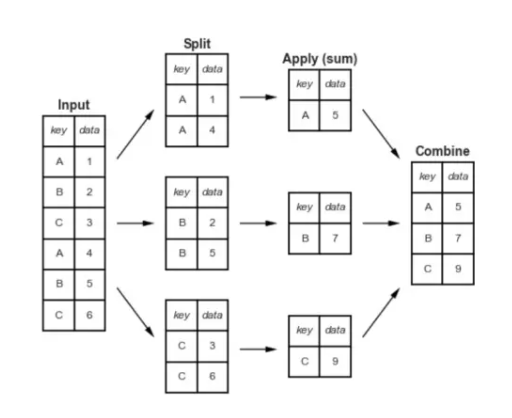

In [19]:
toy_df = pd.DataFrame({
    'client_id': [1, 2, 2, 3, 1, 1],
    'item': ['chocolate', 'cheese', 'ham', 'candy', 'chair', 'book'],
    'price': [68, 280, 302, 39, 2099, 1089]
})

toy_df

,client_id,item,price
0,1,chocolate,68
1,2,cheese,280
2,2,ham,302
3,3,candy,39
4,1,chair,2099
5,1,book,1089


In [20]:
grouped = toy_df.groupby('client_id')
grouped

In [21]:
grouped.groups

{1: [0, 4, 5], 2: [1, 2], 3: [3]}

In [22]:
grouped.sum()

,item,price
client_id,,
1,chocolatechairbook,3256
2,cheeseham,582
3,candy,39


In [23]:
grouped.agg({'price': ['sum', 'min', 'max']})

price           
            sum  min   max
client_id                 
1          3256   68  2099
2           582  280   302
3            39   39    39

In [24]:
users.groupby('Geography').agg({'Age': ['mean'], 'EstimatedSalary': ['min']})

,Age,EstimatedSalary
,mean,min
Geography,,
France,38.513266,90.07
Germany,39.770734,11.58
Spain,38.890997,417.41


### pivot_table

In [25]:
toy_df

,client_id,item,price
0,1,chocolate,68
1,2,cheese,280
2,2,ham,302
3,3,candy,39
4,1,chair,2099
5,1,book,1089


In [26]:
toy_df.pivot_table(index='client_id',
                   values='price',
                   aggfunc='sum')

,price
client_id,
1,3256
2,582
3,39


In [27]:
users.pivot_table(index='Geography',
                  aggfunc={'Age': ['mean'], 'EstimatedSalary': 'min'})

,Age,EstimatedSalary
,mean,min
Geography,,
France,38.513266,90.07
Germany,39.770734,11.58
Spain,38.890997,417.41


In [28]:
users.pivot_table(index='Geography',
                  columns='Gender',
                  values='EstimatedSalary',
                  aggfunc='mean',
                  margins=True,
                  margins_name='Total')

Gender,Female,Male,Total
Geography,,,
France,99592.255128,100174.252495,99911.871875
Germany,102446.424124,99910.369711,101116.714573
Spain,100734.107475,98425.687680,99440.572281
Total,100615.703129,99665.818876,100097.342609


### CROSSTAB

In [29]:
pd.crosstab(index=users['Geography'],
            columns=users['Gender'])

Gender,Female,Male
Geography,,
France,2260,2753
Germany,1193,1315
Spain,1089,1388


In [30]:
pd.crosstab(index=users['Geography'],
            columns=users['Gender'],
            values=users['EstimatedSalary'],
            aggfunc='mean')


Gender,Female,Male
Geography,,
France,99592.255128,100174.252495
Germany,102446.424124,99910.369711
Spain,100734.107475,98425.687680


In [31]:
pd.crosstab(index=users['Geography'],
            columns=users['Gender'],
            normalize='all')

Gender,Female,Male
Geography,,
France,0.226045,0.275355
Germany,0.119324,0.131526
Spain,0.108922,0.138828


In [32]:
pd.crosstab(index=users['Geography'],
            columns=users['Gender'],
            normalize='index')

Gender,Female,Male
Geography,,
France,0.450828,0.549172
Germany,0.475678,0.524322
Spain,0.439645,0.560355


In [33]:
pd.crosstab(index=users['Geography'],
            columns=users['Gender'],
            normalize='columns')

Gender,Female,Male
Geography,,
France,0.497578,0.504582
Germany,0.262660,0.241019
Spain,0.239762,0.254399


### Встроенные визуализации

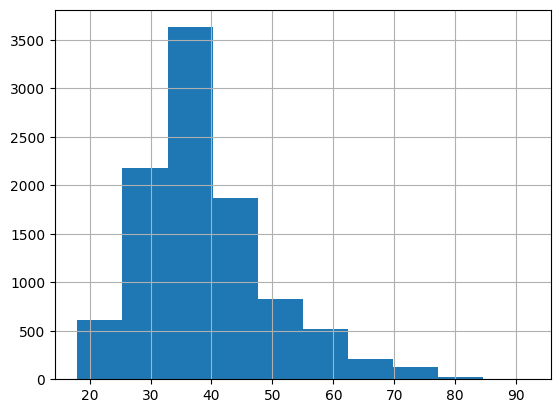

In [34]:
users['Age'].hist();

In [35]:
data = users.groupby('Gender').count()['Age']
data.name = 'Gender'
data

,Gender
Gender,
Female,4542
Male,5456


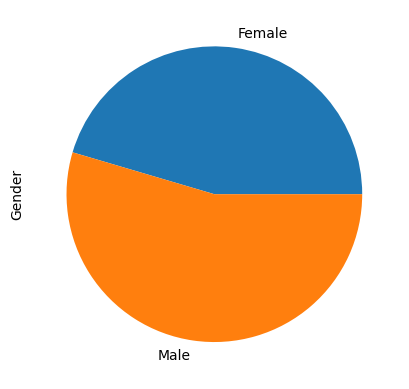

In [36]:
data.plot.pie(y='Gender');

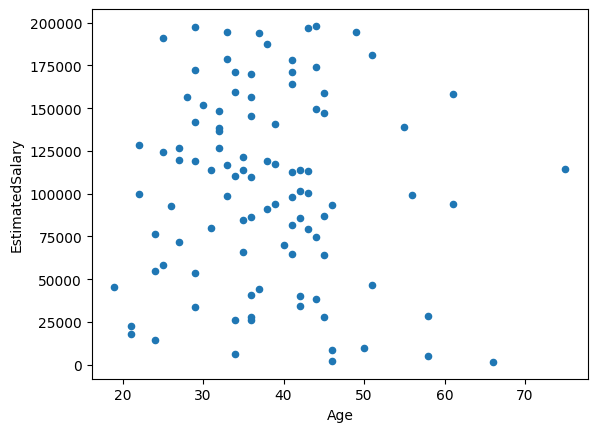

In [37]:
users.iloc[:100].plot.scatter(x='Age', y='EstimatedSalary');

In [38]:
data = bank.groupby('Tenure').count()['Balance']
data.name = 'num_clients'
data

,num_clients
Tenure,
0,413
1,1032
2,1048
3,1008
4,985
5,1011
6,964
7,1027
8,1024


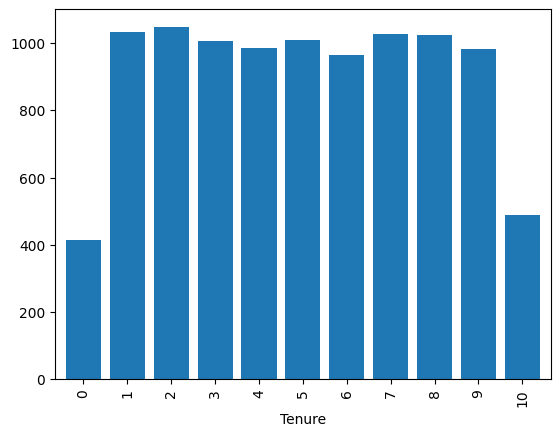

In [39]:
data.plot.bar(width=0.8);